In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#-*- coding: utf-8 -*-
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

Using TensorFlow backend.


In [0]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# 이번에는 reshape(60000, 28, 28, 1): CNN 층을 위해 1차원으로 만들지 않음
# why (60000, 28, 28, 1)?
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

**Convolution layer 추가**

In [0]:
# 모델 설정 컨볼루션 신경망
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # CNN (3x3 크기의 32개 마스크)
model.add(Conv2D(64, (3, 3), activation='relu'))  # CNN (3x3 크기의 64개 마스크)
model.add(MaxPooling2D(pool_size=2))    # Max Pooling (1/2 크기로 줄임)
# model.add(Dropout(0.25))    # Dropout: 노드 중 25% 랜덤하게 끔
model.add(Flatten())    # Flatten: 1차원으로 변형
model.add(Dense(128,  activation='relu'))   # 기존 층: 128개 노드
model.add(Dropout(0.5))     # Dropout: 노드 중 50% 랜덤하게 끔
model.add(Dense(10, activation='softmax'))  # 출력층: 10개의 출력값

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.05407, saving model to ./model/01-0.0541.hdf5

Epoch 00002: val_loss improved from 0.05407 to 0.03675, saving model to ./model/02-0.0368.hdf5

Epoch 00003: val_loss did not improve from 0.03675

Epoch 00004: val_loss improved from 0.03675 to 0.03193, saving model to ./model/04-0.0319.hdf5

Epoch 00005: val_loss improved from 0.03193 to 0.03191, saving model to ./model/05-0.0319.hdf5

Epoch 00006: val_loss improved from 0.03191 to 0.02865, saving model to ./model/06-0.0286.hdf5

Epoch 00007: val_loss improved from 0.02865 to 0.02850, saving model to ./model/07-0.0285.hdf5

Epoch 00008: val_loss improved from 0.02850 to 0.02776, saving model to ./model/08-0.0278.hdf5

Epoch 00009: val_loss did not improve from 0.02776

Epoch 00010: val_loss did not improve from 0.02776

Epoch 00011: val_loss did not improve from 0.02776

Epoch 00012: val_loss did not improve from 0.02776

Epoch 00013: val_loss did not improve from 0.02776

Epoch 00014: val_lo

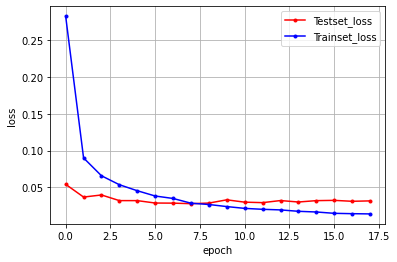

In [0]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()